<a href="https://colab.research.google.com/github/mc-ivan/mod8-regresion-logistica/blob/main/notebook/Practica2_RegresionLogistica_IvanMamani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2: Regresion Logistica
**Maestria en Ingenieria Matematica**

***MOD8: Modelaje Mediante IA en Economia***

**Participante:** Ivan Mamani Condori

---

Crear un modelo para clasificar pacientes con cardiopatia dependiendo de sus datos personales

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, auc, roc_curve # Evaluar el modelo
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/mc-ivan/mod8-regresion-logistica/main/dataset/pacientes_data.csv"
df = pd.read_csv(url)

print("Dataset cargado correctamente.")
print(df.info(), "\n")

print("Primeras filas del dataset:")
display(df.head())

Dataset cargado correctamente.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Edad               1500 non-null   int64  
 1   Nivel_Colesterol   1500 non-null   float64
 2   Presion_Sistolica  1500 non-null   float64
 3   Fumador            1500 non-null   object 
 4   Genero             1500 non-null   object 
 5   Cardiopatia        1500 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 70.4+ KB
None 

Primeras filas del dataset:


,Edad,Nivel_Colesterol,Presion_Sistolica,Fumador,Genero,Cardiopatia
0,60,241.642230,93.954248,No,Masculino,0
1,40,225.169462,133.453914,No,Masculino,0
2,46,166.257920,116.824440,No,Femenino,0
3,35,193.501456,134.014179,No,Femenino,0
4,52,170.080438,137.899183,No,Femenino,0


In [3]:
# Exploración de datos
print("Estadísticas descriptivas:")
display(df.describe())

Estadísticas descriptivas:


,Edad,Nivel_Colesterol,Presion_Sistolica,Cardiopatia
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,51.242667,202.100380,130.580564,0.281333
std,13.017145,41.007939,20.239520,0.449800
min,29.000000,100.000000,80.000000,0.000000
25%,40.000000,174.219369,117.023039,0.000000
50%,51.000000,201.479851,130.633943,0.000000
75%,62.000000,230.481134,144.380904,1.000000
max,74.000000,370.424860,197.145094,1.000000


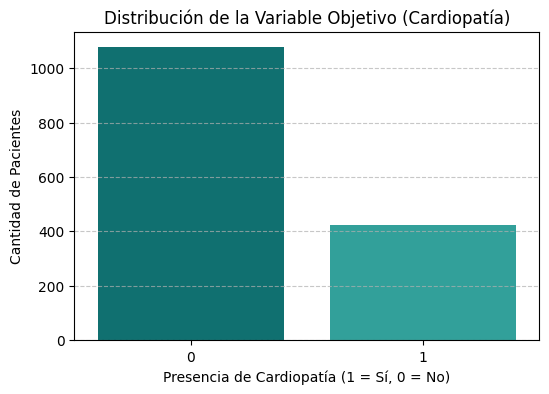

In [27]:
# Gráfico de distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='Cardiopatia',
    hue='Cardiopatia',                # Asignamos hue igual al eje x
    palette=['#008080', '#20B2AA'],   # Tonos teal
    legend=False                      # Evita duplicar la leyenda
)
plt.title("Distribución de la Variable Objetivo (Cardiopatía)")
plt.xlabel("Presencia de Cardiopatía (1 = Sí, 0 = No)")
plt.ylabel("Cantidad de Pacientes")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

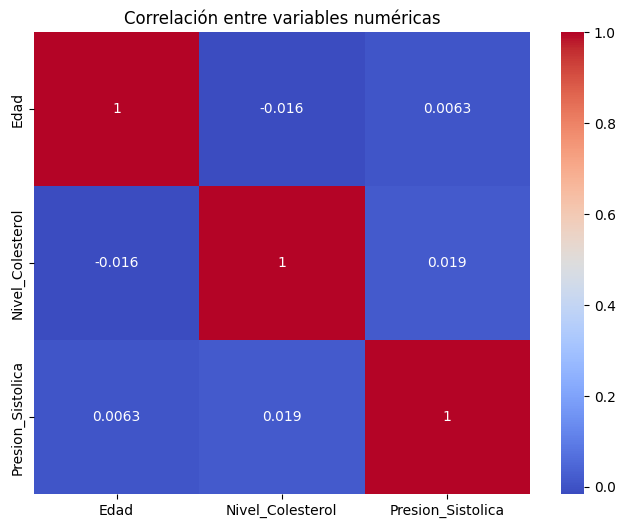

In [8]:
# Correlación entre variables numéricas
numeric_data = df.select_dtypes(include=[np.number]).drop(columns=['Cardiopatia'], errors='ignore')
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True)
plt.title('Correlación entre variables numéricas')
plt.show()

In [9]:
# Definir variables predictoras (X) y objetivo (y)
X = df.drop(columns=['Cardiopatia'], axis=1)
y = df['Cardiopatia']

In [10]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# Identificar columnas
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas numéricas: {numeric_cols}")
print(f"Columnas categóricas: {categorical_cols}")

Columnas numéricas: ['Edad', 'Nivel_Colesterol', 'Presion_Sistolica']
Columnas categóricas: ['Fumador', 'Genero']


In [12]:
# Crear transformadores - Estandarizar las columnas numericas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Onehot encoding a las columnas categoricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [15]:
# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Crear pipeline del modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Edad', 'Nivel_Colesterol',
                                                   'Presion_Sistolica']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Fumador', 'Genero'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [16]:
# Predicciones
y_pred = model_pipeline.predict(X_test)
y_pred_prob = model_pipeline.predict_proba(X_test)[:,1]

In [17]:
# Evaluación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       216
           1       0.90      0.88      0.89        84

    accuracy                           0.94       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.94      0.94      0.94       300



In [20]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[208   8]
 [ 10  74]]


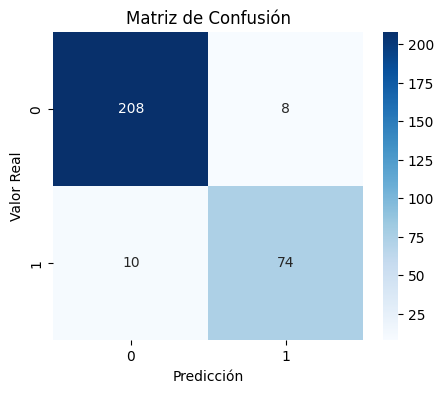

In [21]:
# Graficar Matriz de confusion
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

In [22]:
# Métricas globales
acc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo (Accuracy): {acc:.4f}")

Precisión del modelo (Accuracy): 0.9400


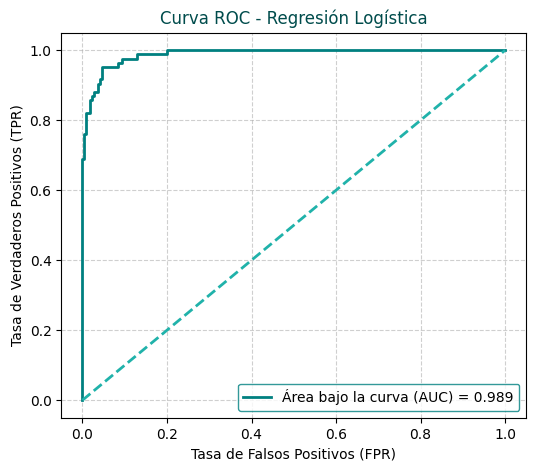

In [29]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='#008080', lw=2, label=f'Área bajo la curva (AUC) = {roc_auc:.3f}')  # línea principal teal
plt.plot([0, 1], [0, 1], color='#20B2AA', lw=2, linestyle='--')  # línea diagonal más clara
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística', color='#004C4C')
plt.legend(loc="lower right", facecolor='white', edgecolor='#008080')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [25]:
# Ejemplo de predicción individual
ejemplo = X.sample(1, random_state=42)
pred = model_pipeline.predict(ejemplo)[0]
prob = model_pipeline.predict_proba(ejemplo)[0][1]
print("\nEjemplo de predicción:")
display(ejemplo)
print(f"Predicción: {'Cardiopatía' if pred == 1 else 'Sin Cardiopatía'} (Probabilidad = {prob:.2f})")



Ejemplo de predicción:


,Edad,Nivel_Colesterol,Presion_Sistolica,Fumador,Genero
1116,57,216.025452,108.256883,No,Masculino


Predicción: Sin Cardiopatía (Probabilidad = 0.01)
